In [ ]:
import os
# !pip install tensorflow
# !pip install scikit-learn
# !pip install opencv-python
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
import pandas as pd


In [2]:
# Set the path to the root folder containing subfolders for each character
root_folder = 'D:\Personal\zDocuments\Lachu\Project_MSc\Data\Data Dumps\PREPROCESSING\TestFolder'
num_classes = len(os.listdir(root_folder))
num_classes

43

In [3]:
# # Set the path to the root folder containing subfolders for each class
# root_folder = 'D:/Personal/zDocuments/Lachu/Project_MSc/Data/Data Dumps/PREPROCESSING/TestFolder'

# # Initialize the total number of images
# total_images = 0

# # Iterate through each class subfolder in the root folder
# for class_folder in os.listdir(root_folder):
#     class_folder_path = os.path.join(root_folder, class_folder)
    
#     # Check if it's a directory (to ensure it's a class folder)
#     if os.path.isdir(class_folder_path):
#         # Count the number of files in the class folder
#         num_images_in_class = len([f for f in os.listdir(class_folder_path) if os.path.isfile(os.path.join(class_folder_path, f))])
#         total_images += num_images_in_class

# print(f"Total number of images: {total_images}")


In [4]:
# Step 1: Read and Load the Data
def load_data(root_folder):
    data = []
    labels = []
    
    for char_folder in os.listdir(root_folder):
        char_path = os.path.join(root_folder, char_folder)
        for img_file in os.listdir(char_path):
            img_path = os.path.join(char_path, img_file)
            # Read the image with alpha channel (transparency)
            img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
            # img = cv2.resize(img, (224, 224))
            img = img/255
            img[img<1] = 0
            data.append(img)
            labels.append(char_folder)
    return np.array(data), np.array(labels)

In [5]:
# Step 2: Data Preprocessing
data, labels = load_data(root_folder)

# Label encode classes
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split the dataset into training, validation and testing sets
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Further split the training set into training (70%) and validation (10%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

In [6]:
# Print the number of images in each class
unique_classes, counts = np.unique(y_train, return_counts=True)

for cls, count in zip(unique_classes, counts):
    print(f"Class {cls}: {count} images")

Class 0: 167 images
Class 1: 157 images
Class 2: 163 images
Class 3: 153 images
Class 4: 142 images
Class 5: 128 images
Class 6: 123 images
Class 7: 115 images
Class 8: 127 images
Class 9: 114 images
Class 10: 108 images
Class 11: 113 images
Class 12: 104 images
Class 13: 131 images
Class 14: 118 images
Class 15: 92 images
Class 16: 122 images
Class 17: 119 images
Class 18: 136 images
Class 19: 107 images
Class 20: 108 images
Class 21: 109 images
Class 22: 116 images
Class 23: 127 images
Class 24: 102 images
Class 25: 118 images
Class 26: 128 images
Class 27: 107 images
Class 28: 110 images
Class 29: 100 images
Class 30: 100 images
Class 31: 107 images
Class 32: 92 images
Class 33: 122 images
Class 34: 119 images
Class 35: 108 images
Class 36: 93 images
Class 37: 104 images
Class 38: 87 images
Class 39: 101 images
Class 40: 100 images
Class 41: 99 images
Class 42: 95 images


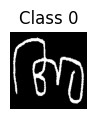

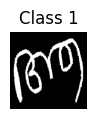

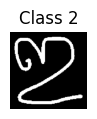

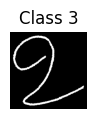

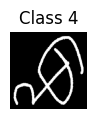

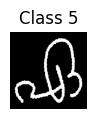

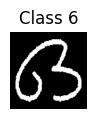

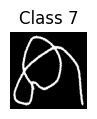

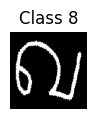

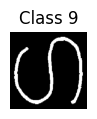

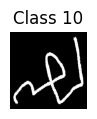

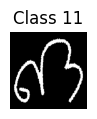

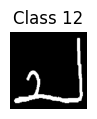

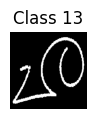

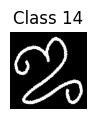

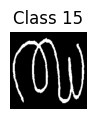

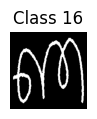

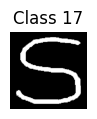

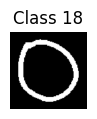

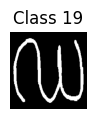

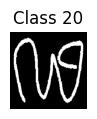

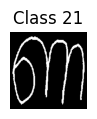

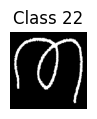

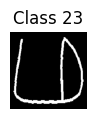

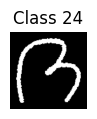

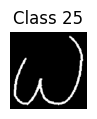

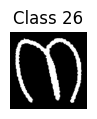

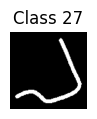

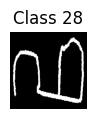

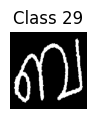

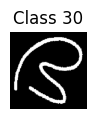

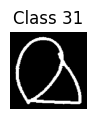

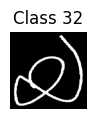

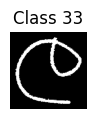

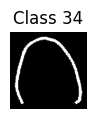

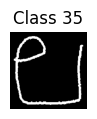

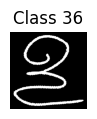

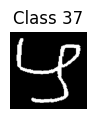

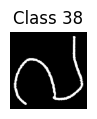

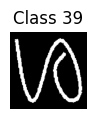

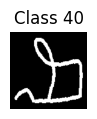

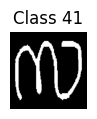

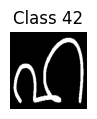

In [7]:
# Display the first image from each class
for cls in unique_classes:
    # Find the first image index of the current class
    idx = np.where(y_train == cls)[0][0]
    
    # Extract the image and display it
    image = X_train[idx]
    
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap='gray')  # Assuming grayscale images; adjust cmap if necessary
    plt.title(f'Class {cls}')  # Set title as the class label
    plt.axis('off')  # Turn off axis
    plt.show()

In [8]:
# Load the DenseNet-201 model pre-trained on ImageNet data
model = DenseNet201()
# model = DenseNet201(weights='imagenet')

# Add L2 regularization to all dense layers
for layer in model.layers:
    if isinstance(layer, Dense):
        layer.kernel_regularizer = l2(0.1)  # Adjust the regularization parameter (lambda) as needed


In [9]:
# Step 4: Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
# # Create an instance of the ImageDataGenerator
# datagen = ImageDataGenerator(
#     rotation_range=0,      # Randomly rotate images by 0 to 20 degrees
#     width_shift_range=0.05,  # Randomly shift images horizontally by up to 20% of the width
#     height_shift_range=0.05, # Randomly shift images vertically by up to 20% of the height
#     shear_range=0.1,        # Shear intensity (shear angle in radians)
#     zoom_range=0.1,         # Randomly zoom into images by up to 20%
#     horizontal_flip=False,   # Randomly flip images horizontally
#     vertical_flip=False,     # Randomly flip images vertically
#     fill_mode='nearest'     # Strategy for filling in newly created pixels (e.g., 'nearest')
# )

# # Create a flow from the training data and labels
# # This will generate augmented images on-the-fly during training
# augmented_data_generator = datagen.flow(X_train, y_train, batch_size=16)

# # Step 5: Train the Model
# # Now you can use augmented_data_generator as your training data in model.fit
# history = model.fit(augmented_data_generator, epochs=10, steps_per_epoch=len(X_train)//16, batch_size=32, validation_data=(X_val, y_val))

In [11]:
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/3


156/156 [==============================] - 1221s 7s/step - loss: 0.5833 - accuracy: 0.8648 - val_loss: 0.2302 - val_accuracy: 0.9342
Epoch 2/3
156/156 [==============================] - 1271s 8s/step - loss: 0.0754 - accuracy: 0.9806 - val_loss: 0.3166 - val_accuracy: 0.9202
Epoch 3/3
156/156 [==============================] - 1114s 7s/step - loss: 0.0709 - accuracy: 0.9796 - val_loss: 0.3122 - val_accuracy: 0.9090


In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

# Calculate accuracy for each character
accuracies = {}
for char_label in set(y_test):
    indices = (y_test == char_label)
    accuracies[char_label] = accuracy_score(y_test[indices], y_pred_classes[indices])

# Print accuracy for each character
for char_label, accuracy in accuracies.items():
    print(f'Character {char_label}: Test Accuracy = {accuracy:.4f}')

# Overall test accuracy
overall_test_loss, overall_test_acc = model.evaluate(X_test, y_test)
print(f'\nOverall Test Accuracy: {overall_test_acc:.4f}')


45/45 [==============================] - 102s 2s/step
Character 0: Test Accuracy = 0.9655
Character 1: Test Accuracy = 0.9434
Character 2: Test Accuracy = 0.9111
Character 3: Test Accuracy = 0.8788
Character 4: Test Accuracy = 0.7442
Character 5: Test Accuracy = 1.0000
Character 6: Test Accuracy = 0.8605
Character 7: Test Accuracy = 0.8286
Character 8: Test Accuracy = 0.9667
Character 9: Test Accuracy = 1.0000
Character 10: Test Accuracy = 0.8056
Character 11: Test Accuracy = 1.0000
Character 12: Test Accuracy = 1.0000
Character 13: Test Accuracy = 1.0000
Character 14: Test Accuracy = 1.0000
Character 15: Test Accuracy = 0.9600
Character 16: Test Accuracy = 0.9688
Character 17: Test Accuracy = 0.4043
Character 18: Test Accuracy = 0.1765
Character 19: Test Accuracy = 0.9706
Character 20: Test Accuracy = 1.0000
Character 21: Test Accuracy = 1.0000
Character 22: Test Accuracy = 1.0000
Character 23: Test Accuracy = 1.0000
Character 24: Test Accuracy = 0.9643
Character 25: Test Accuracy = 1

In [23]:
num_classes = y_pred.shape[1]  # Get number of classes from y_pred shape
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)

top_k_accuracy = tf.keras.metrics.TopKCategoricalAccuracy(k=7)
top_k_accuracy.update_state(y_test_one_hot, y_pred)
print(f"Top-3 Accuracy: {top_k_accuracy.result().numpy():.4f}")

Top-3 Accuracy: 0.9965


In [ ]:
# Top 2 accuracy: 97.55// Top 3 accuracy: 98.32

In [13]:
# Initialize a dictionary to store predicted classes and their counts for each true class
predicted_counts = {char_label: {} for char_label in set(y_test)}

# Count predictions for each true class
for true_label in set(y_test):
    true_indices = (y_test == true_label)
    predicted_labels = y_pred_classes[true_indices]
    
    unique_predicted, counts_predicted = np.unique(predicted_labels, return_counts=True)
    for pred_label, count in zip(unique_predicted, counts_predicted):
        predicted_counts[true_label][pred_label] = count

# Print predicted classes and their counts for each true class
for true_label in sorted(predicted_counts.keys()):
    print(f'True Character {true_label}:')
    for pred_label, count in predicted_counts[true_label].items():
        print(f'    Predicted as Character {pred_label}: {count} times')
    print()

True Character 0:
    Predicted as Character 0: 56 times
    Predicted as Character 1: 1 times
    Predicted as Character 21: 1 times

True Character 1:
    Predicted as Character 1: 50 times
    Predicted as Character 5: 1 times
    Predicted as Character 36: 2 times

True Character 2:
    Predicted as Character 2: 41 times
    Predicted as Character 36: 4 times

True Character 3:
    Predicted as Character 3: 29 times
    Predicted as Character 36: 4 times

True Character 4:
    Predicted as Character 4: 32 times
    Predicted as Character 5: 10 times
    Predicted as Character 42: 1 times

True Character 5:
    Predicted as Character 5: 46 times

True Character 6:
    Predicted as Character 5: 2 times
    Predicted as Character 6: 37 times
    Predicted as Character 36: 4 times

True Character 7:
    Predicted as Character 5: 6 times
    Predicted as Character 7: 29 times

True Character 8:
    Predicted as Character 8: 29 times
    Predicted as Character 29: 1 times

True Character

In [14]:
# # Step 6: Evaluate the Model
# test_loss, test_acc = model.evaluate(X_test, y_test)
# print(f'Test accuracy: {test_acc}')

In [15]:
# Access accuracy values from the history object
val_acc = history.history['val_accuracy']
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# df = pd.DataFrame({'Epoch': range(1, len(val_acc) + 1),'val_acc': val_acc, 'train_acc': train_acc, 'train_loss':train_loss, 'val_loss': val_loss})

# # Save dataframe to CSV
# df.to_csv('DN_1_noaug.csv', index=False)


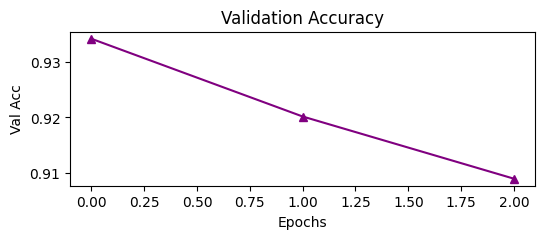

In [16]:
plt.rcParams["figure.figsize"] = (6,2)
plt.plot(val_acc,color='purple',marker='^')
# plt.legend(['Val Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Val Acc')
plt.title('Validation Accuracy')
plt.show()

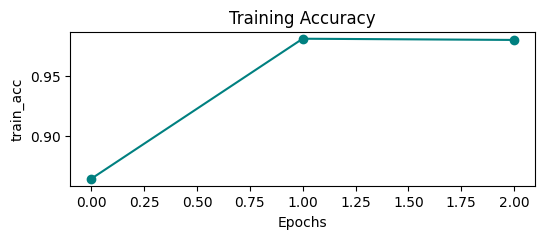

In [17]:
plt.rcParams["figure.figsize"] = (6,2)
plt.plot(train_acc,color='teal',marker='o')
# plt.legend(['Validation Loss Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('train_acc')
plt.title('Training Accuracy')
plt.show()